## PCLS: overview figures

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

# making sure plots & clusters are reproducible
np.random.seed(42)

# custom functions
import sc_toolbox as sct

Running Scanpy 1.8.2, on 2022-12-28 12:02.


In [2]:
## path variables
adata_dir = '/home/niklas/data/220107_Human_PCLS_ASK_joint/220107_PCLS_human_ASK_joint_annotated_NIKLAS.h5ad'

In [3]:
## plotting variables
sc.settings.figdir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/'
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## load anndata object
adata = sc.read(adata_dir)

In [5]:
## have a look at the adata object
adata

AnnData object with n_obs × n_vars = 63581 × 17343
    obs: 'condition', 'modality', 'name', 'patient', 'timepoint', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'dendrogram_cell_type', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'modality_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'connectivities', 'distances'

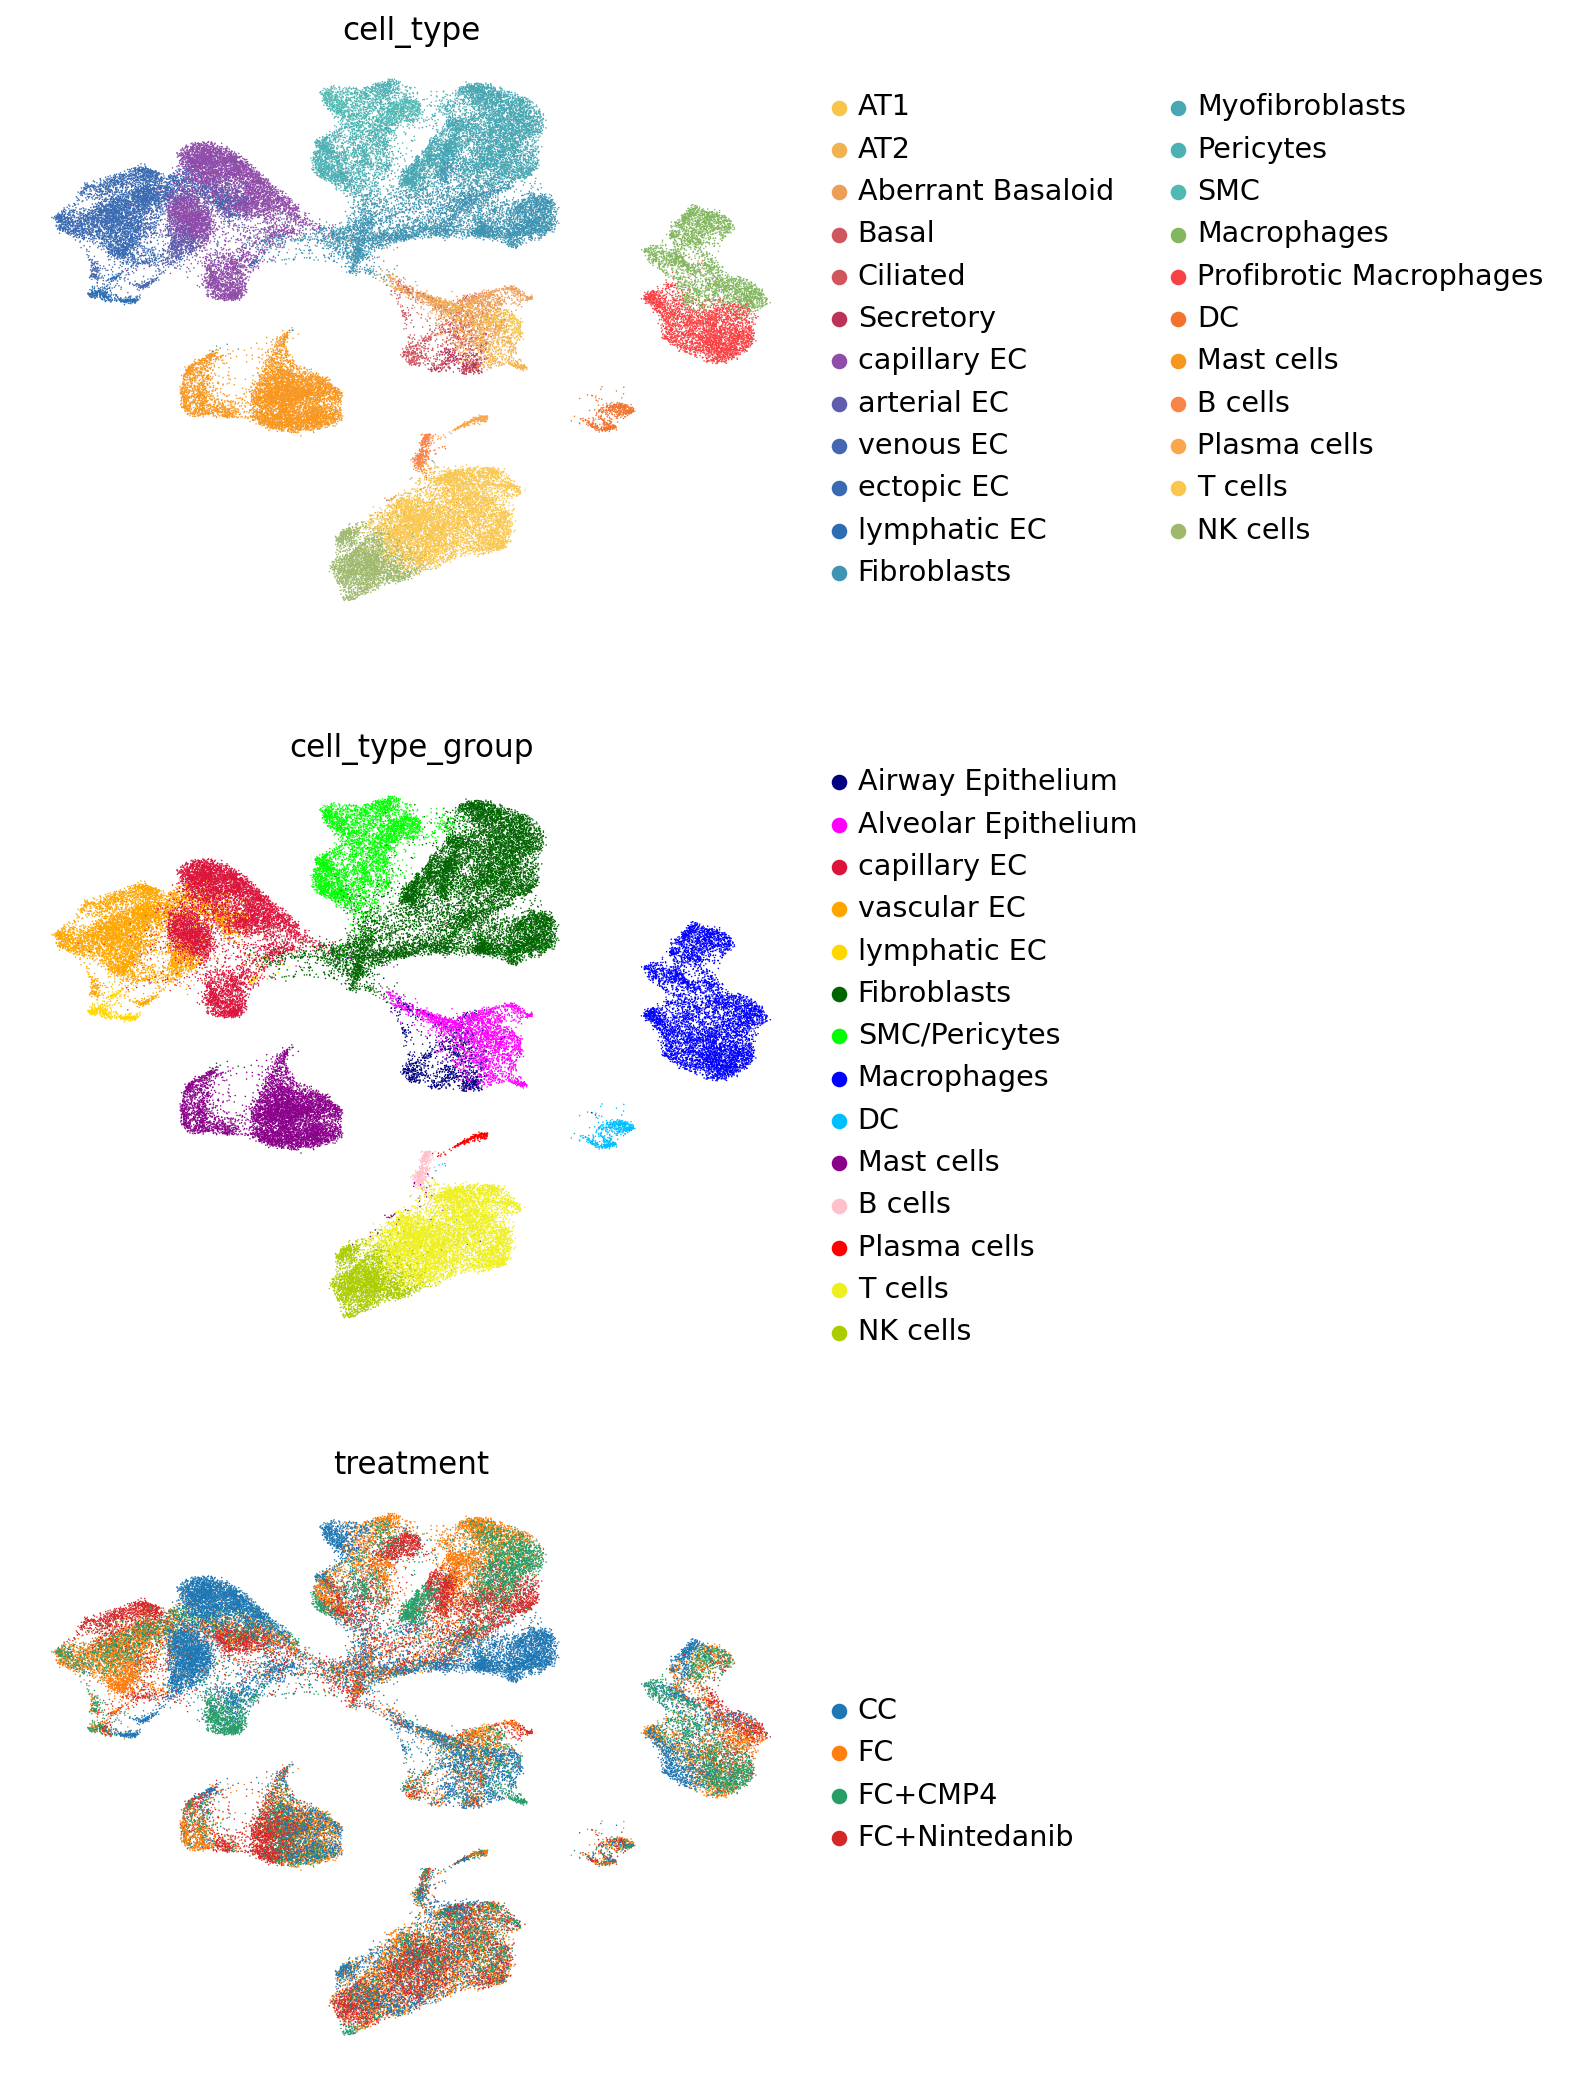

In [6]:
## overview UMAPs
sc.pl.umap(adata, color = ['cell_type','cell_type_group','treatment'], ncols = 1, frameon = False)

In [7]:
treatment_colors = {'CC' : '#87CEFA', # CC
                    'FC' : '#32145E', # FC
                    'FC+Nintedanib' : '#D03833', # Nintedanib
                    'FC+CMP4' : '#F6991C', # CMP4
                   }

In [8]:
## colour scheme for 'cell_type_group' UMAP
cell_type_group_colours = ['navy','magenta','crimson','orange','gold','darkgreen','lime',
                    'blue','deepskyblue','darkmagenta','pink','red','#EEEF20','#AACC00','turquoise']

In [9]:
## colour scheme for 'cell_type' UMAP
cellstate_colors = ['#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00',
             '#FFFF33','#A65628','#F781BF','#999999','#004301',
             '#00FFFF','#00008F','#5F0029','#FFF5FF','#4F4E51',
             '#B499FF','#6700F9','#4D006F','#00806C','#72FF9A',
             '#6A6C00','#E1C78B','#63C1FE','#D90083','#5A3500',
             '#42BBA9','#B29A00','#F203FF','#920000','#004F74'    
            ]

In [10]:
def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())

In [11]:
from matplotlib import colors
gray_red = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "red", "darkred"], N=128)

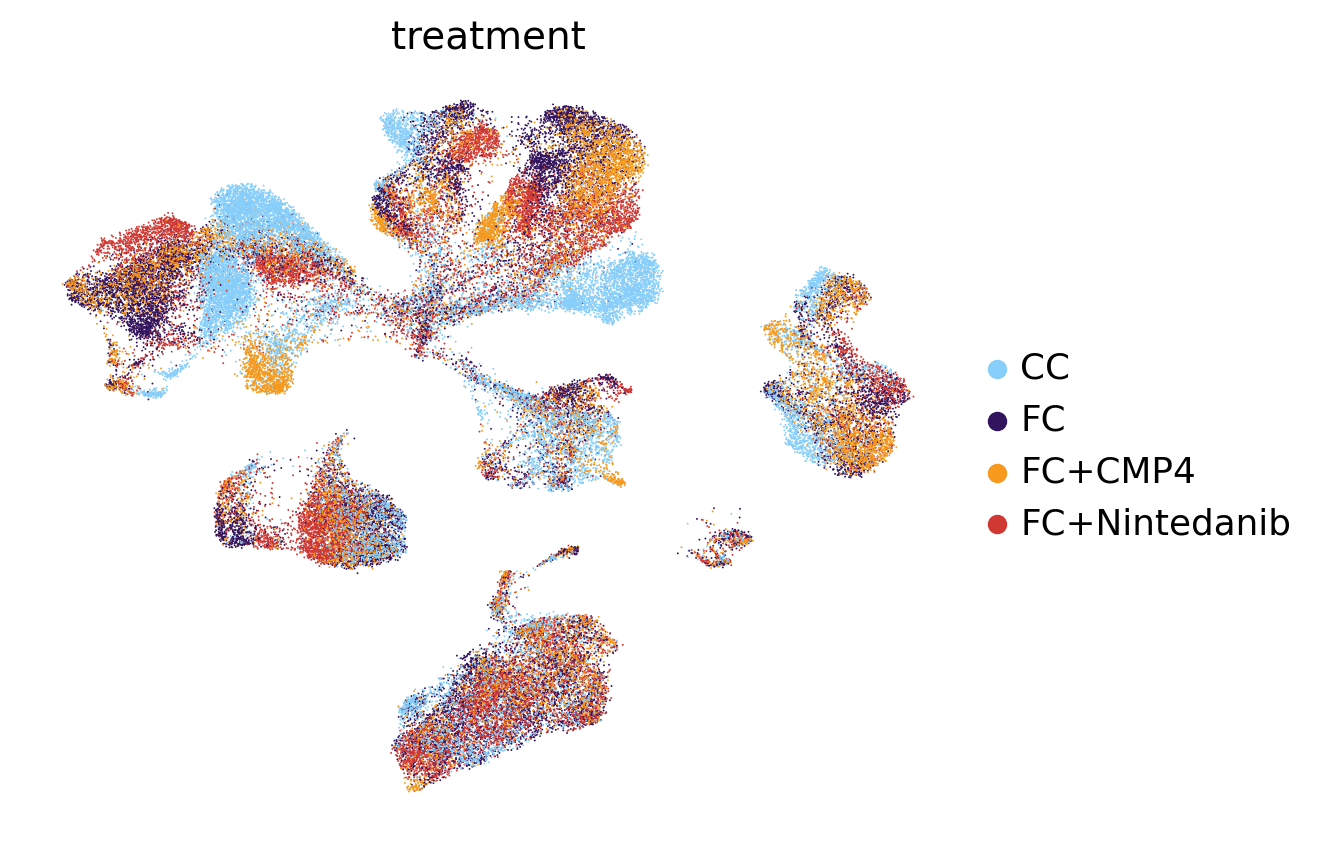

In [12]:
sc.pl.umap(adata, color = ['treatment'], title = 'treatment', frameon = False,  palette = treatment_colors,
           ax = mysize(6, 5, 100))

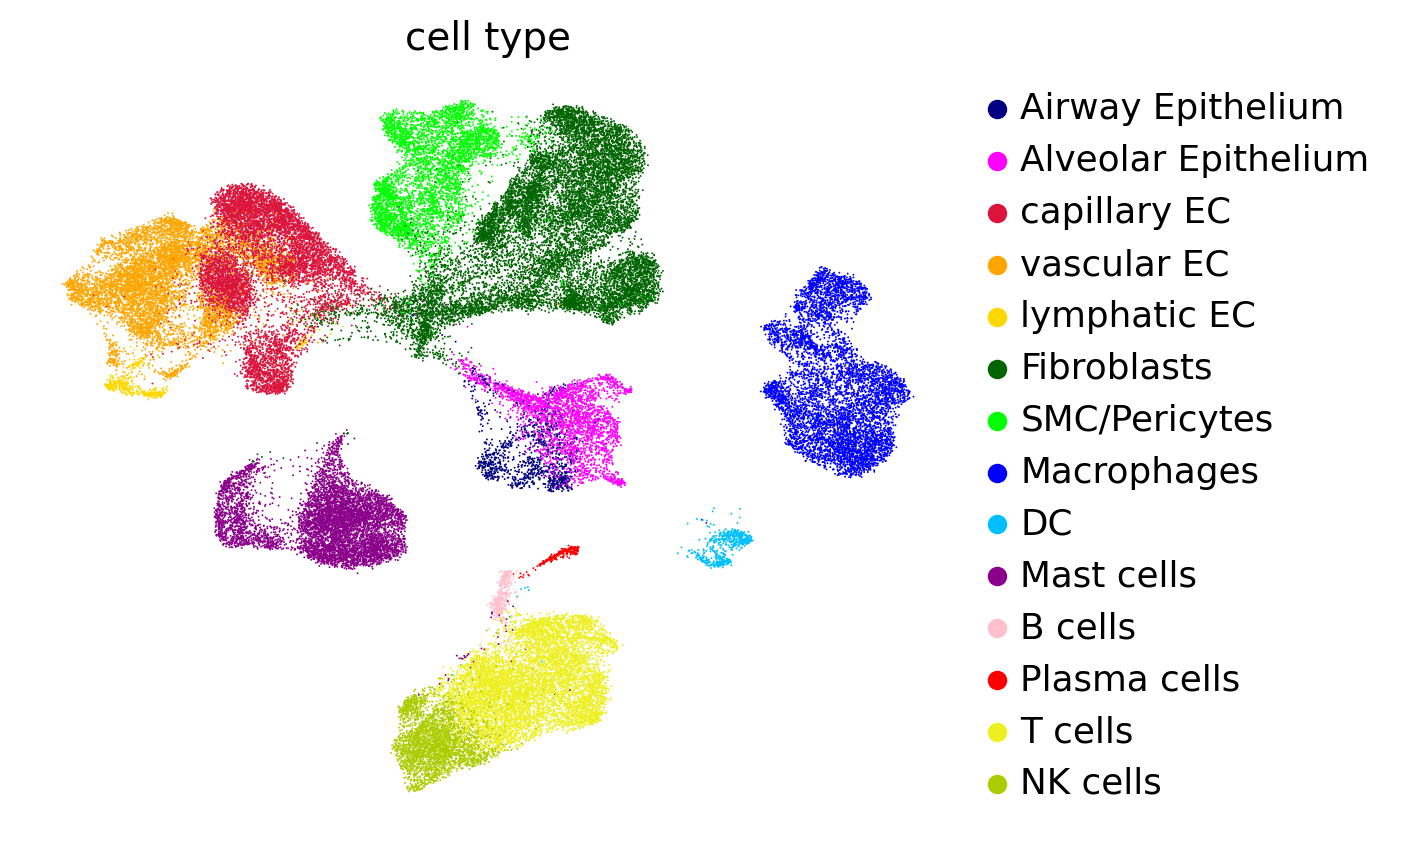

In [13]:
sc.pl.umap(adata, color = ['cell_type_group'], title = 'cell type', palette = cell_type_group_colours,
           frameon = False, ax = mysize(6, 5, 100))

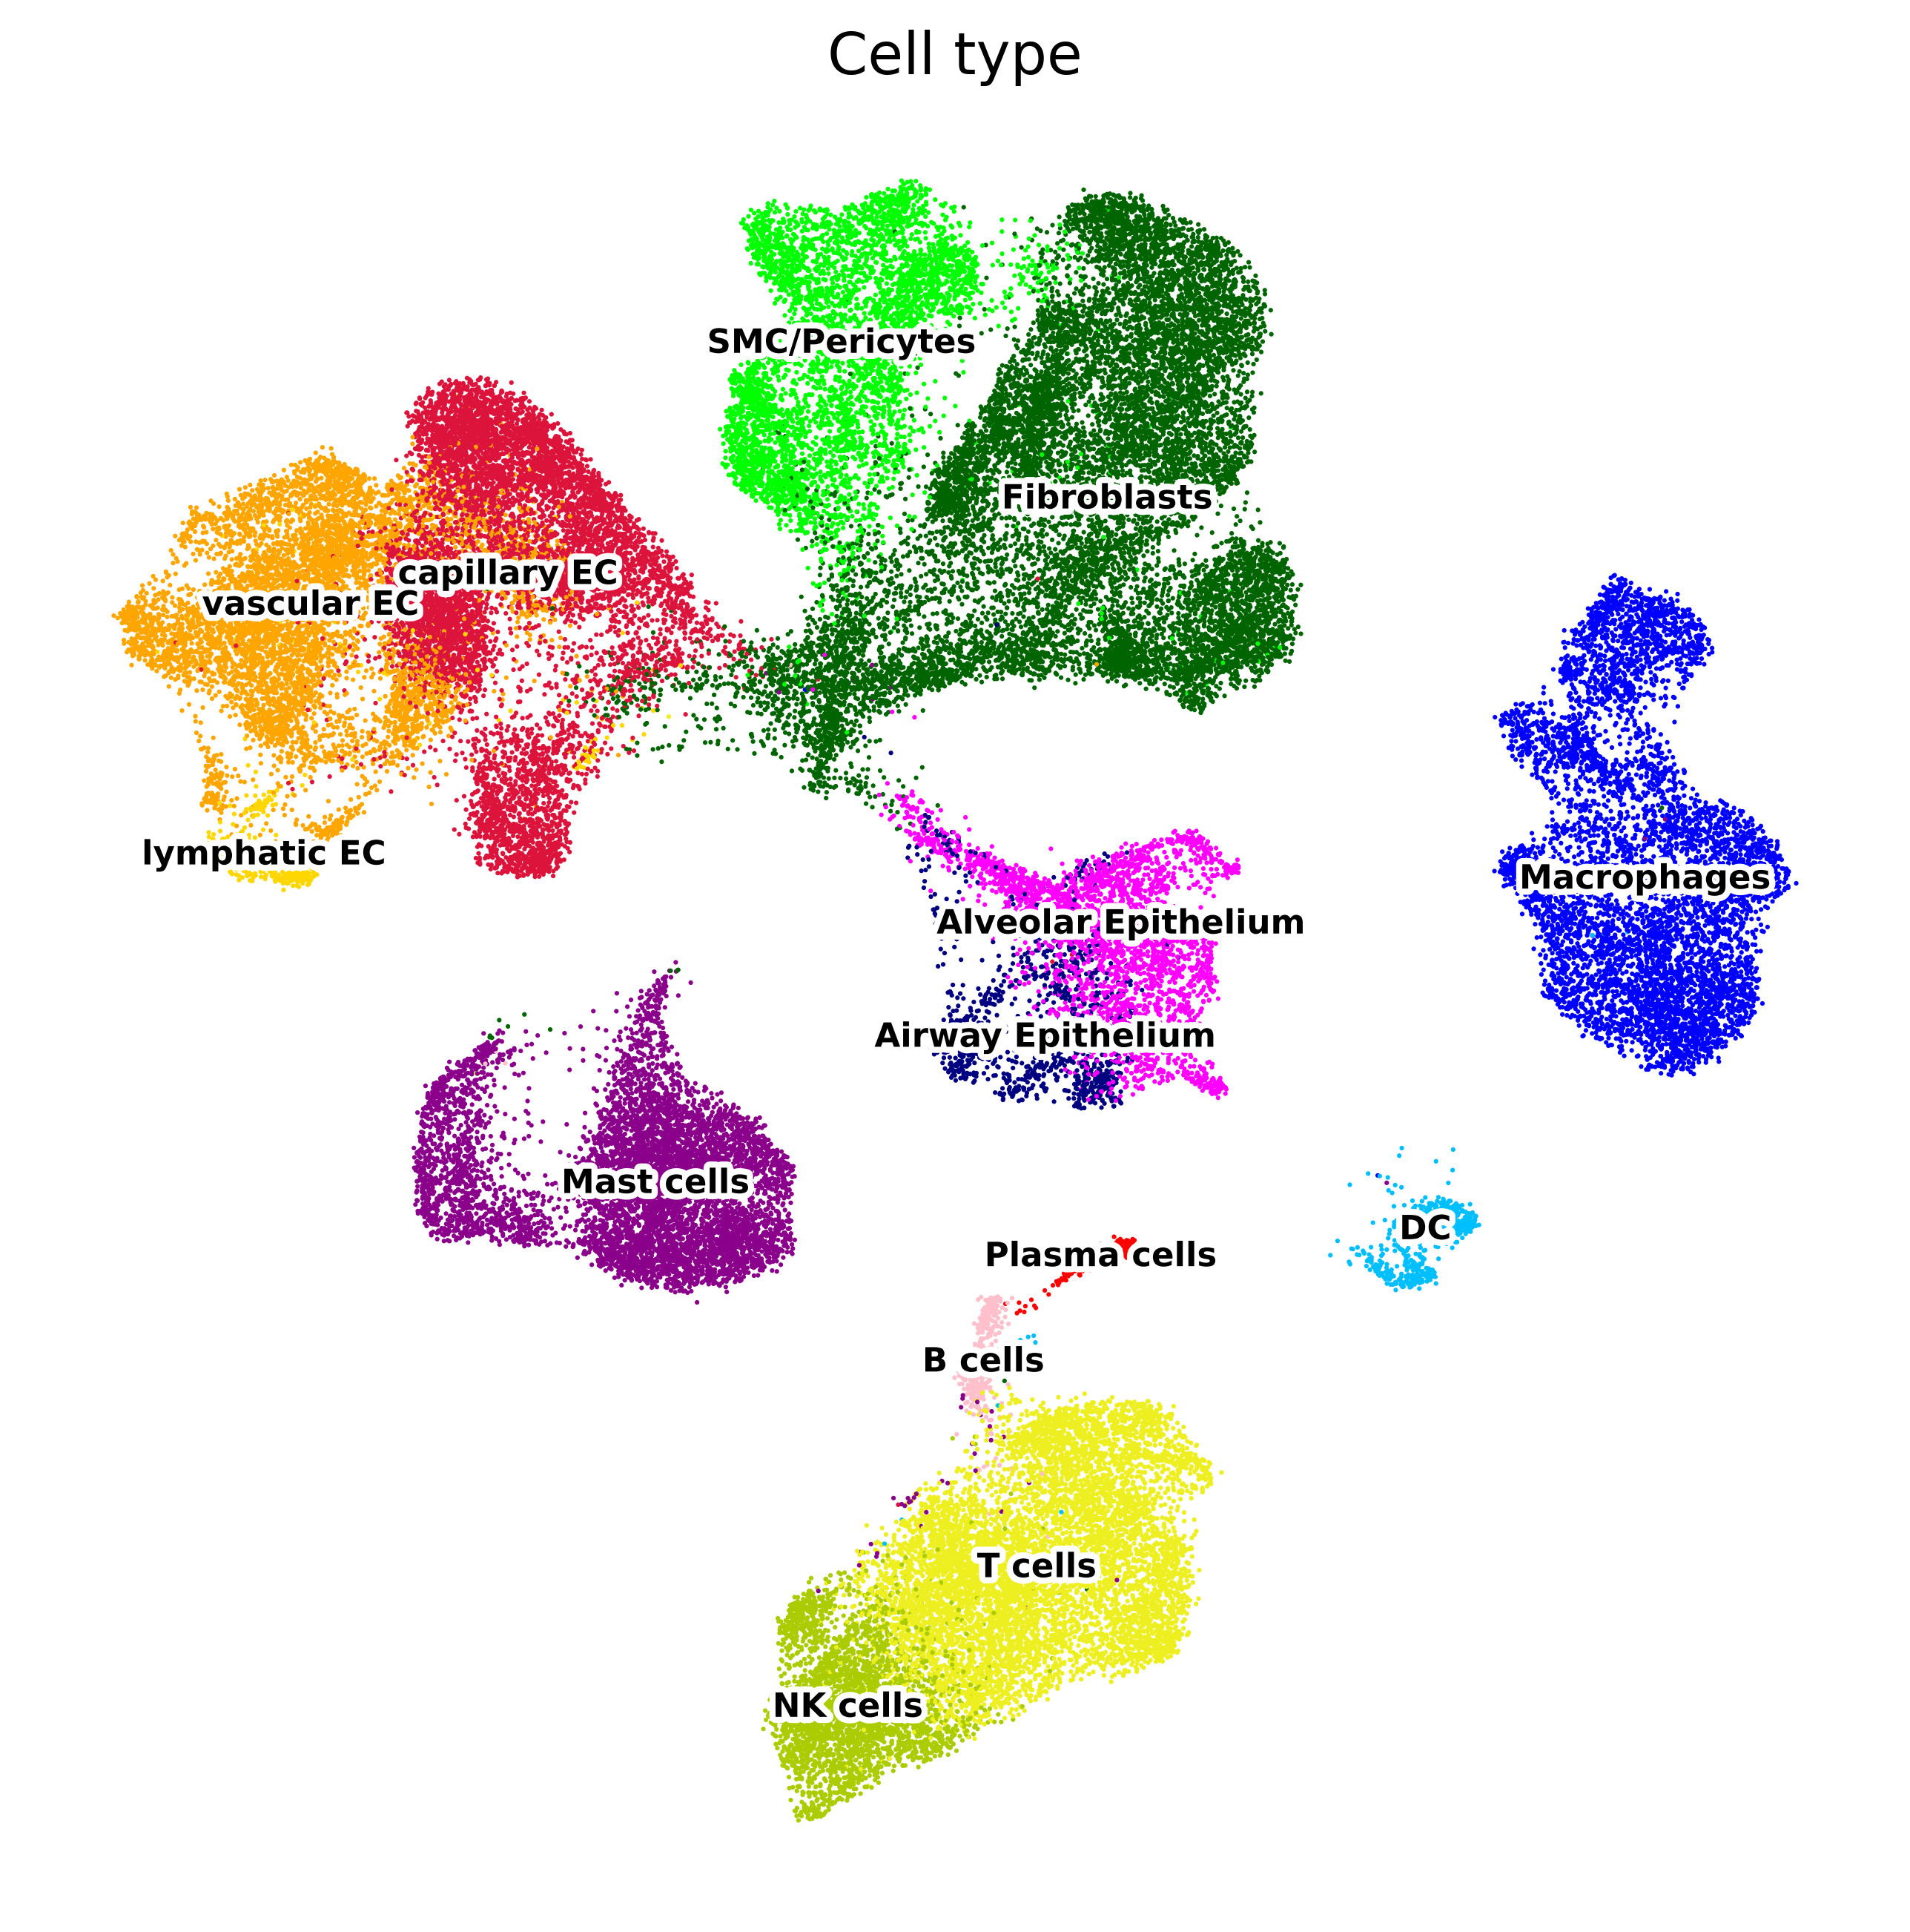

In [14]:
sc.pl.umap(adata, color = 'cell_type_group', size = 5,
           legend_loc = 'on data', legend_fontsize = 'xx-small', legend_fontoutline = 3,
           ax = mysize(8, 8, 200), frameon = False, title = 'Cell type', save = '_celltype_on_data.pdf')

### Save figures

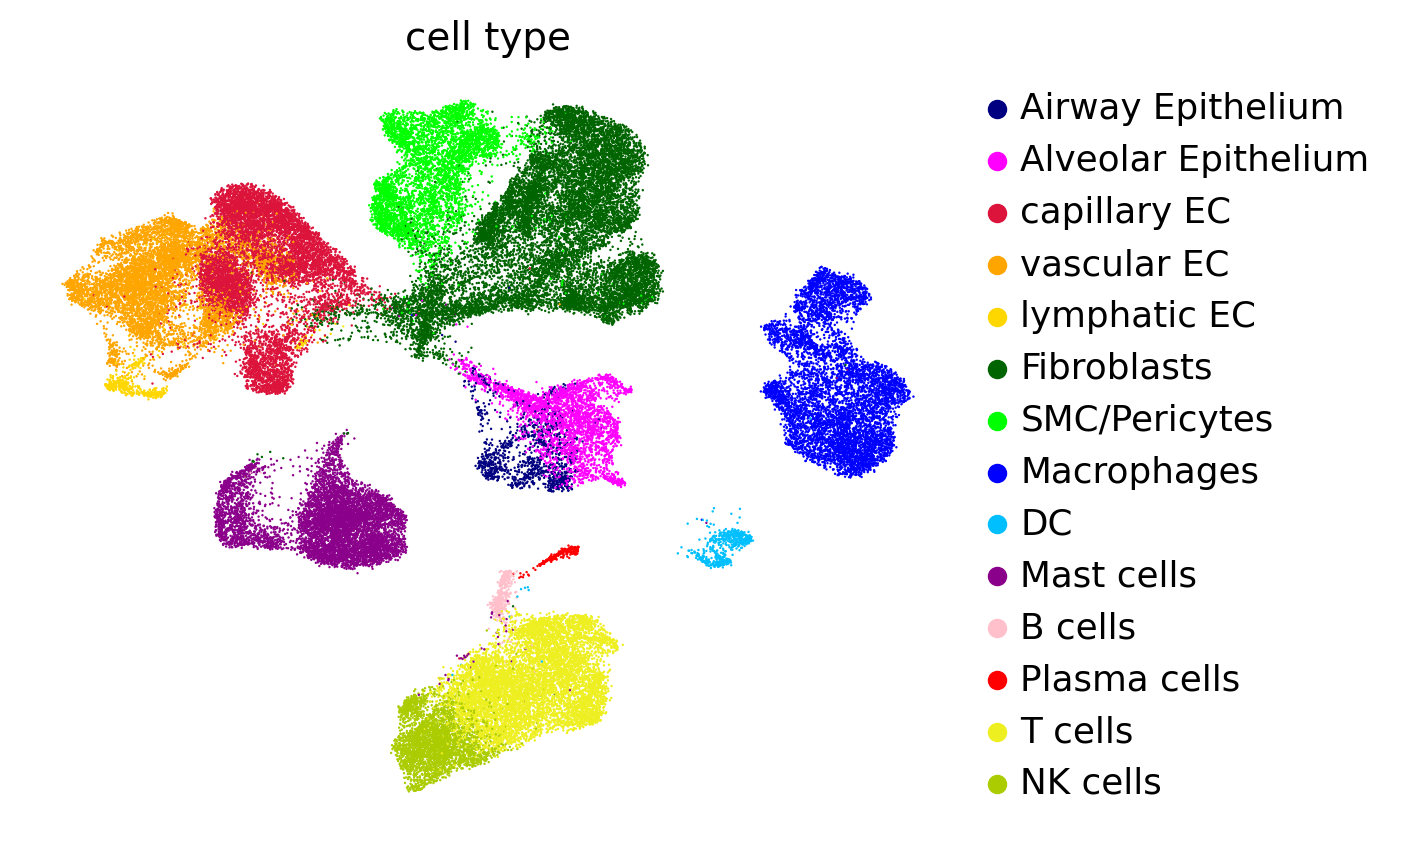

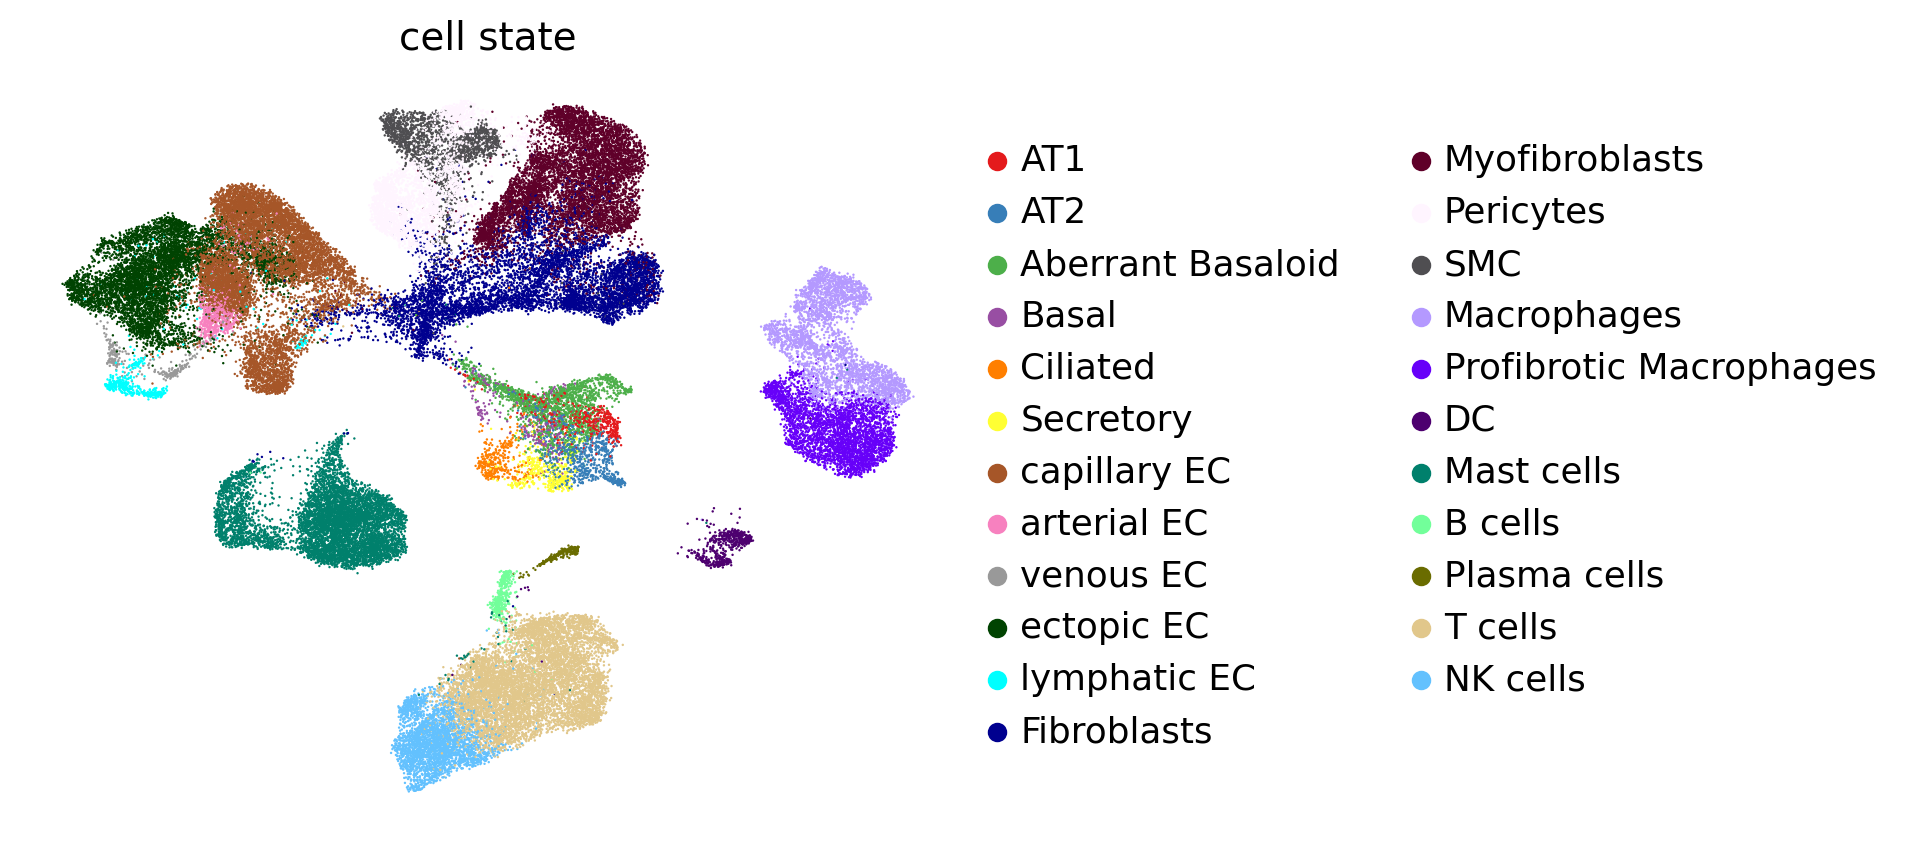

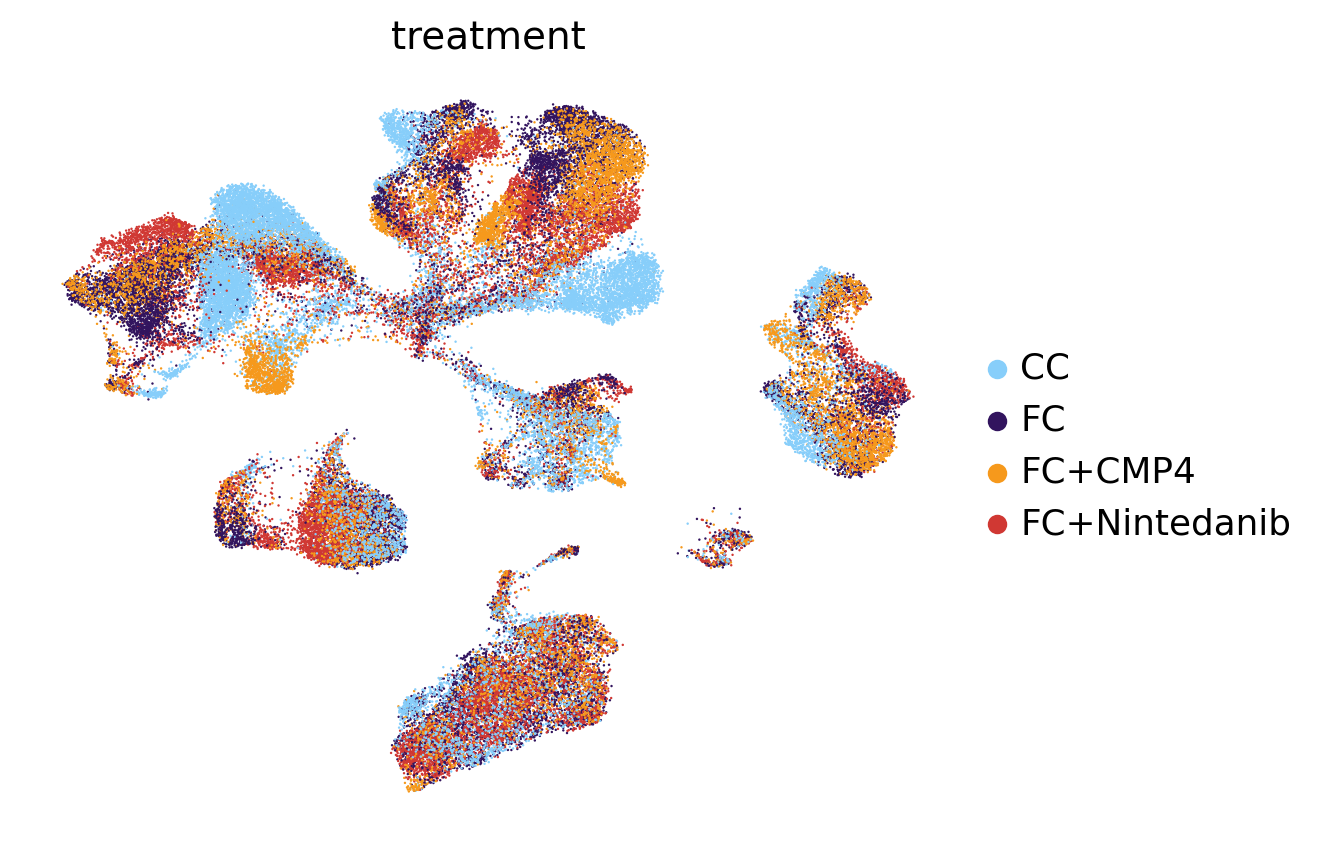

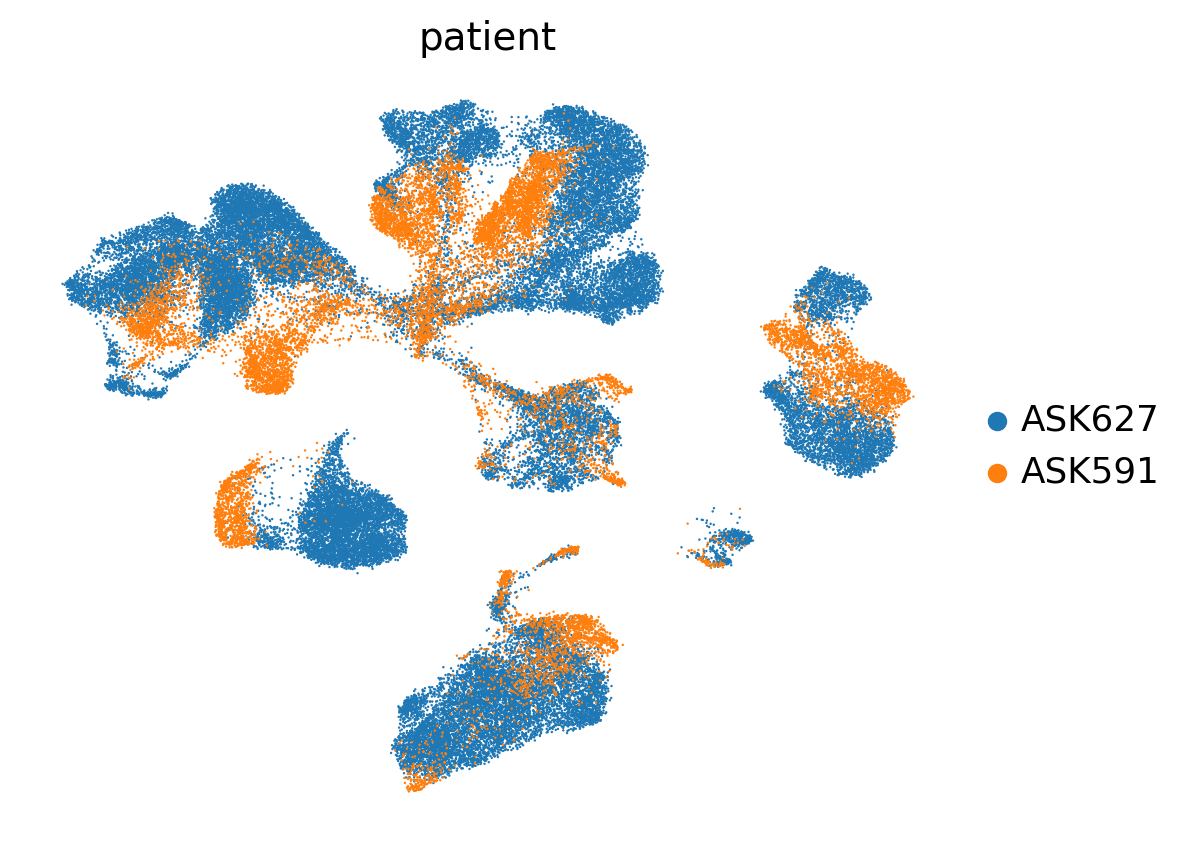

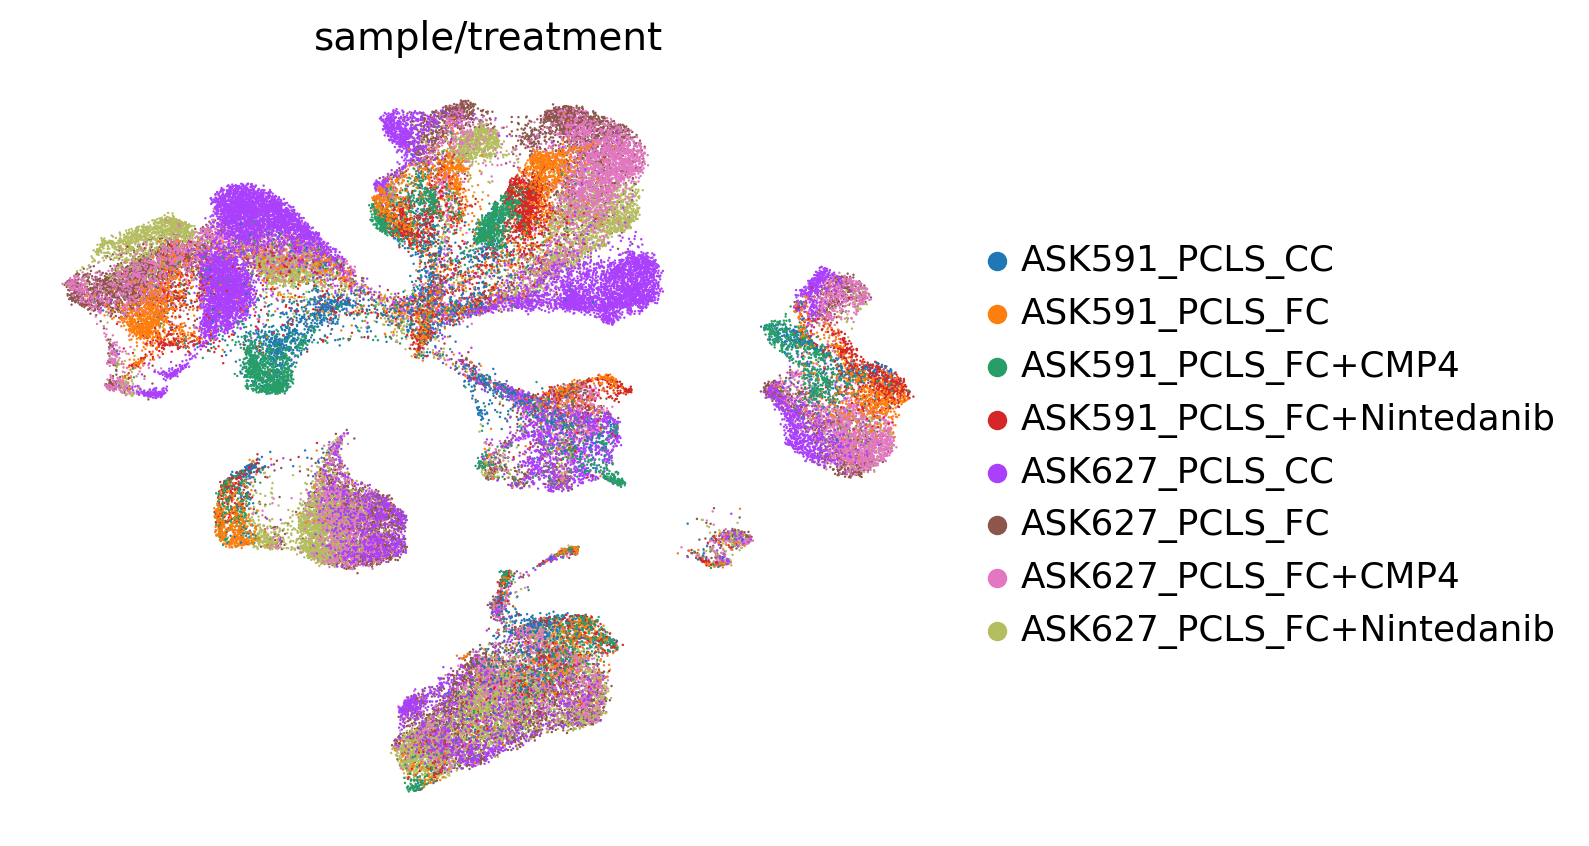

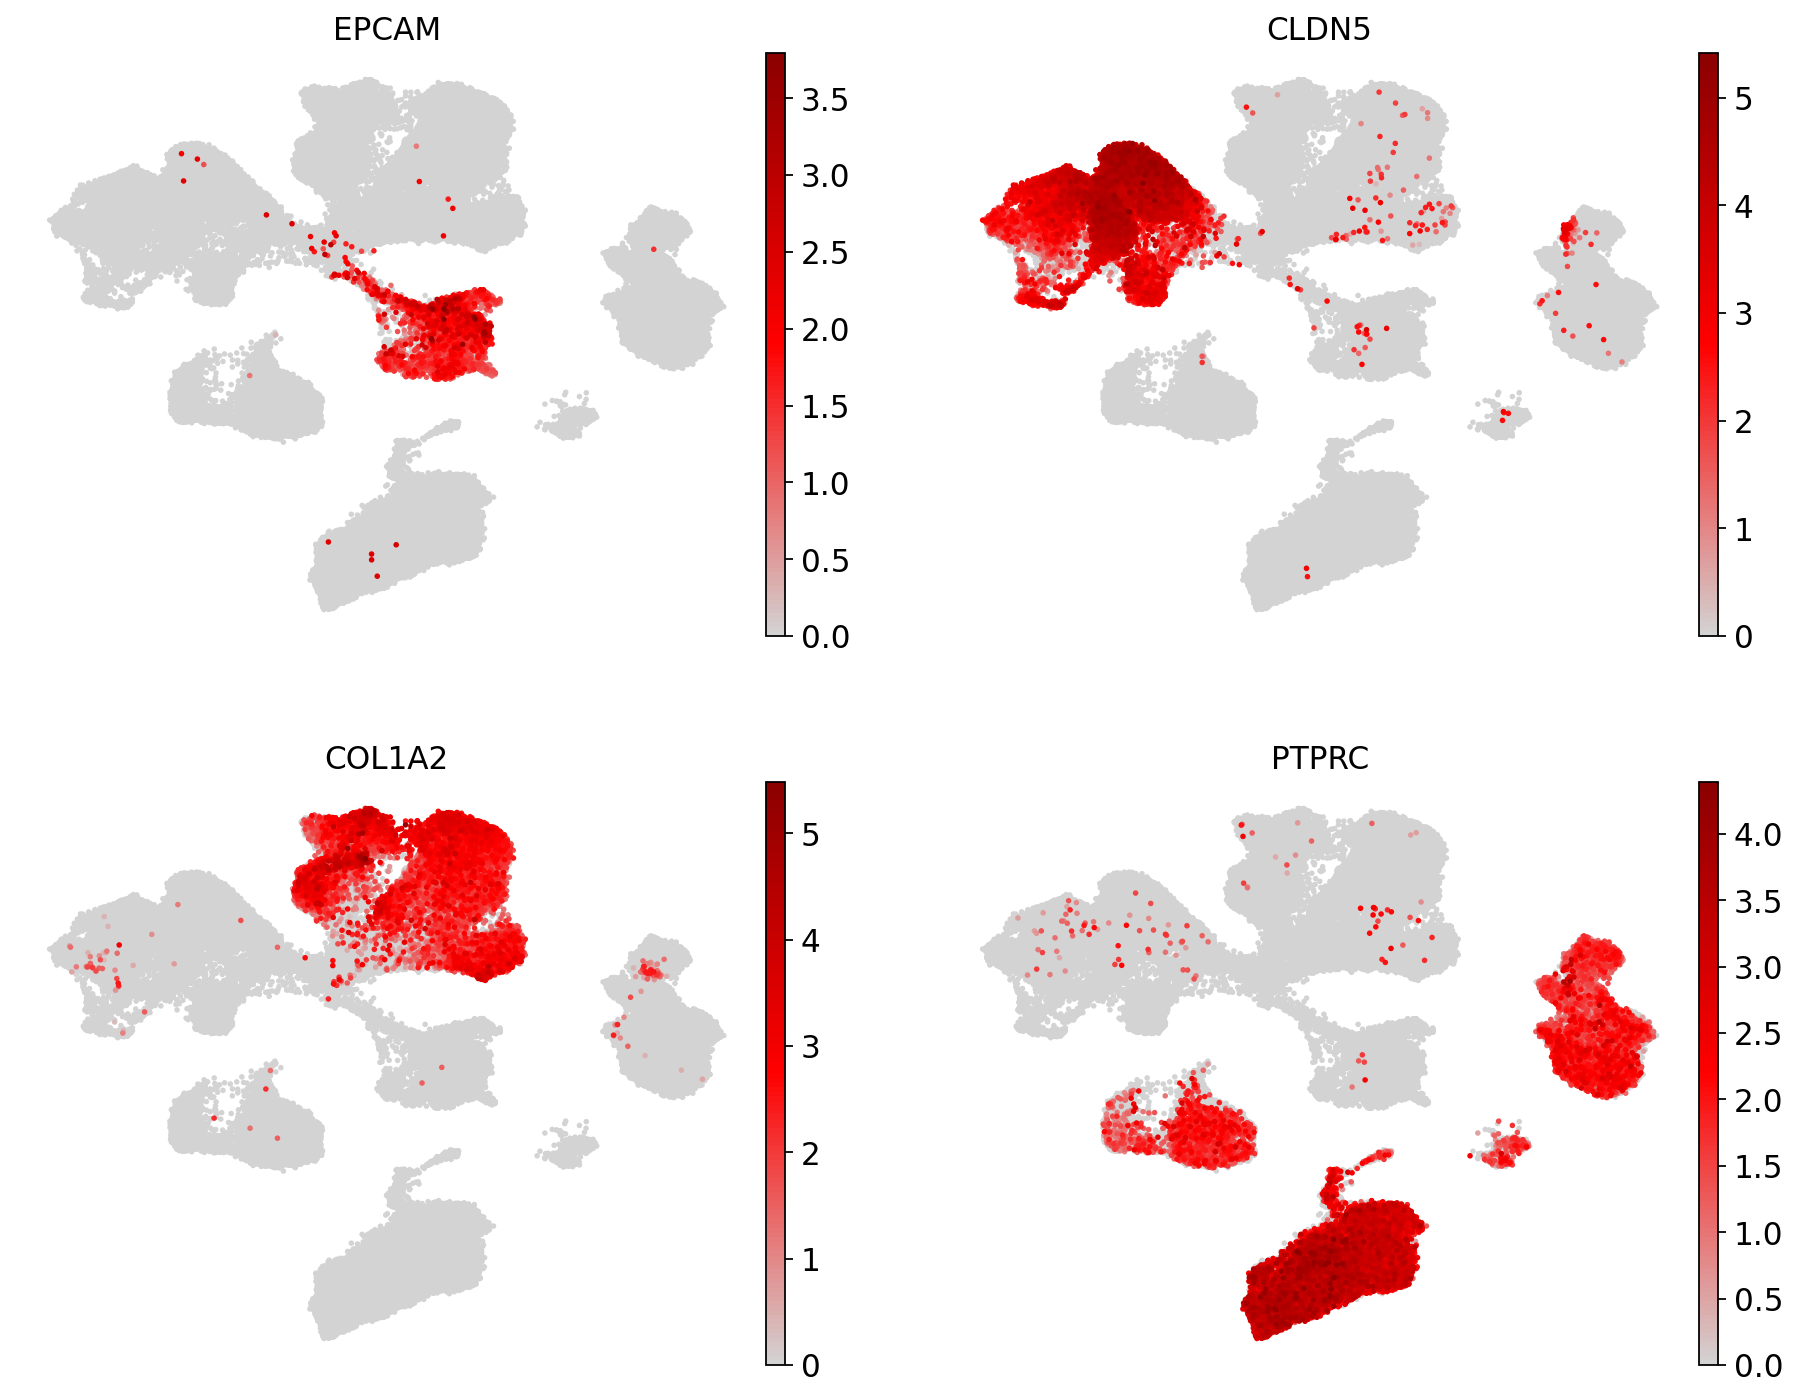

In [15]:
## cell type
sc.pl.umap(adata, color = ['cell_type_group'], title = 'cell type', frameon = False,
           ax = mysize(6, 5, 100), size = 3, save = '_celltype.pdf')

## cell state
sc.pl.umap(adata, color = ['cell_type'], title = 'cell state', frameon = False,
           palette = cellstate_colors,
           ax = mysize(6, 5, 100), size = 3, save = '_cellstate.pdf')

## treatment
sc.pl.umap(adata, color = ['treatment'], title = 'treatment', frameon = False, 
           palette = treatment_colors, 
           ax = mysize(6, 5, 100), size = 3, save = '_treatment.pdf')
## patient / sample ID
sc.pl.umap(adata, color = ['patient'], title = 'patient', frameon = False,
           ax = mysize(6, 5, 100), size = 3, save = '_ASK_identifier.pdf')                           
## sample/treament
sc.pl.umap(adata, color = ['name'], title = 'sample/treatment', frameon = False,
           ax = mysize(6, 5, 100), size = 3, save = '_sample_treatment.pdf')
## lineage marker genes
sc.pl.umap(adata, color = ['EPCAM','CLDN5','COL1A2','PTPRC'], frameon = False, ncols = 2, size = 25,
           cmap = gray_red, save = '_lineage_markers.pdf')

In [15]:
## frequency table
xlabel = 'treatment'
cell_types_label = 'cell_type_group'
cols = adata.uns['%s_colors' %cell_types_label]
celltypes = adata.obs[cell_types_label].cat.categories

relFreqs = sct.calc.relative_frequencies(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

Airway Epithelium  Alveolar Epithelium  capillary EC  vascular EC  \
muc24271           0.004325             0.042287      0.035079     0.173474   
muc24272           0.032297             0.066118      0.252285     0.002438   

          lymphatic EC  Fibroblasts  SMC/Pericytes  Macrophages        DC  \
muc24271      0.006247     0.237866       0.141759     0.149447  0.007689   
muc24272      0.003961     0.204753       0.072821     0.150518  0.004570   

          Mast cells   B cells  Plasma cells   T cells  NK cells treatment  
muc24271    0.112446  0.004325      0.011052  0.055262  0.018741        FC  
muc24272    0.056673  0.019196      0.002438  0.124924  0.007008        CC

Saving Figure to 
/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/rel_freqs.pdf

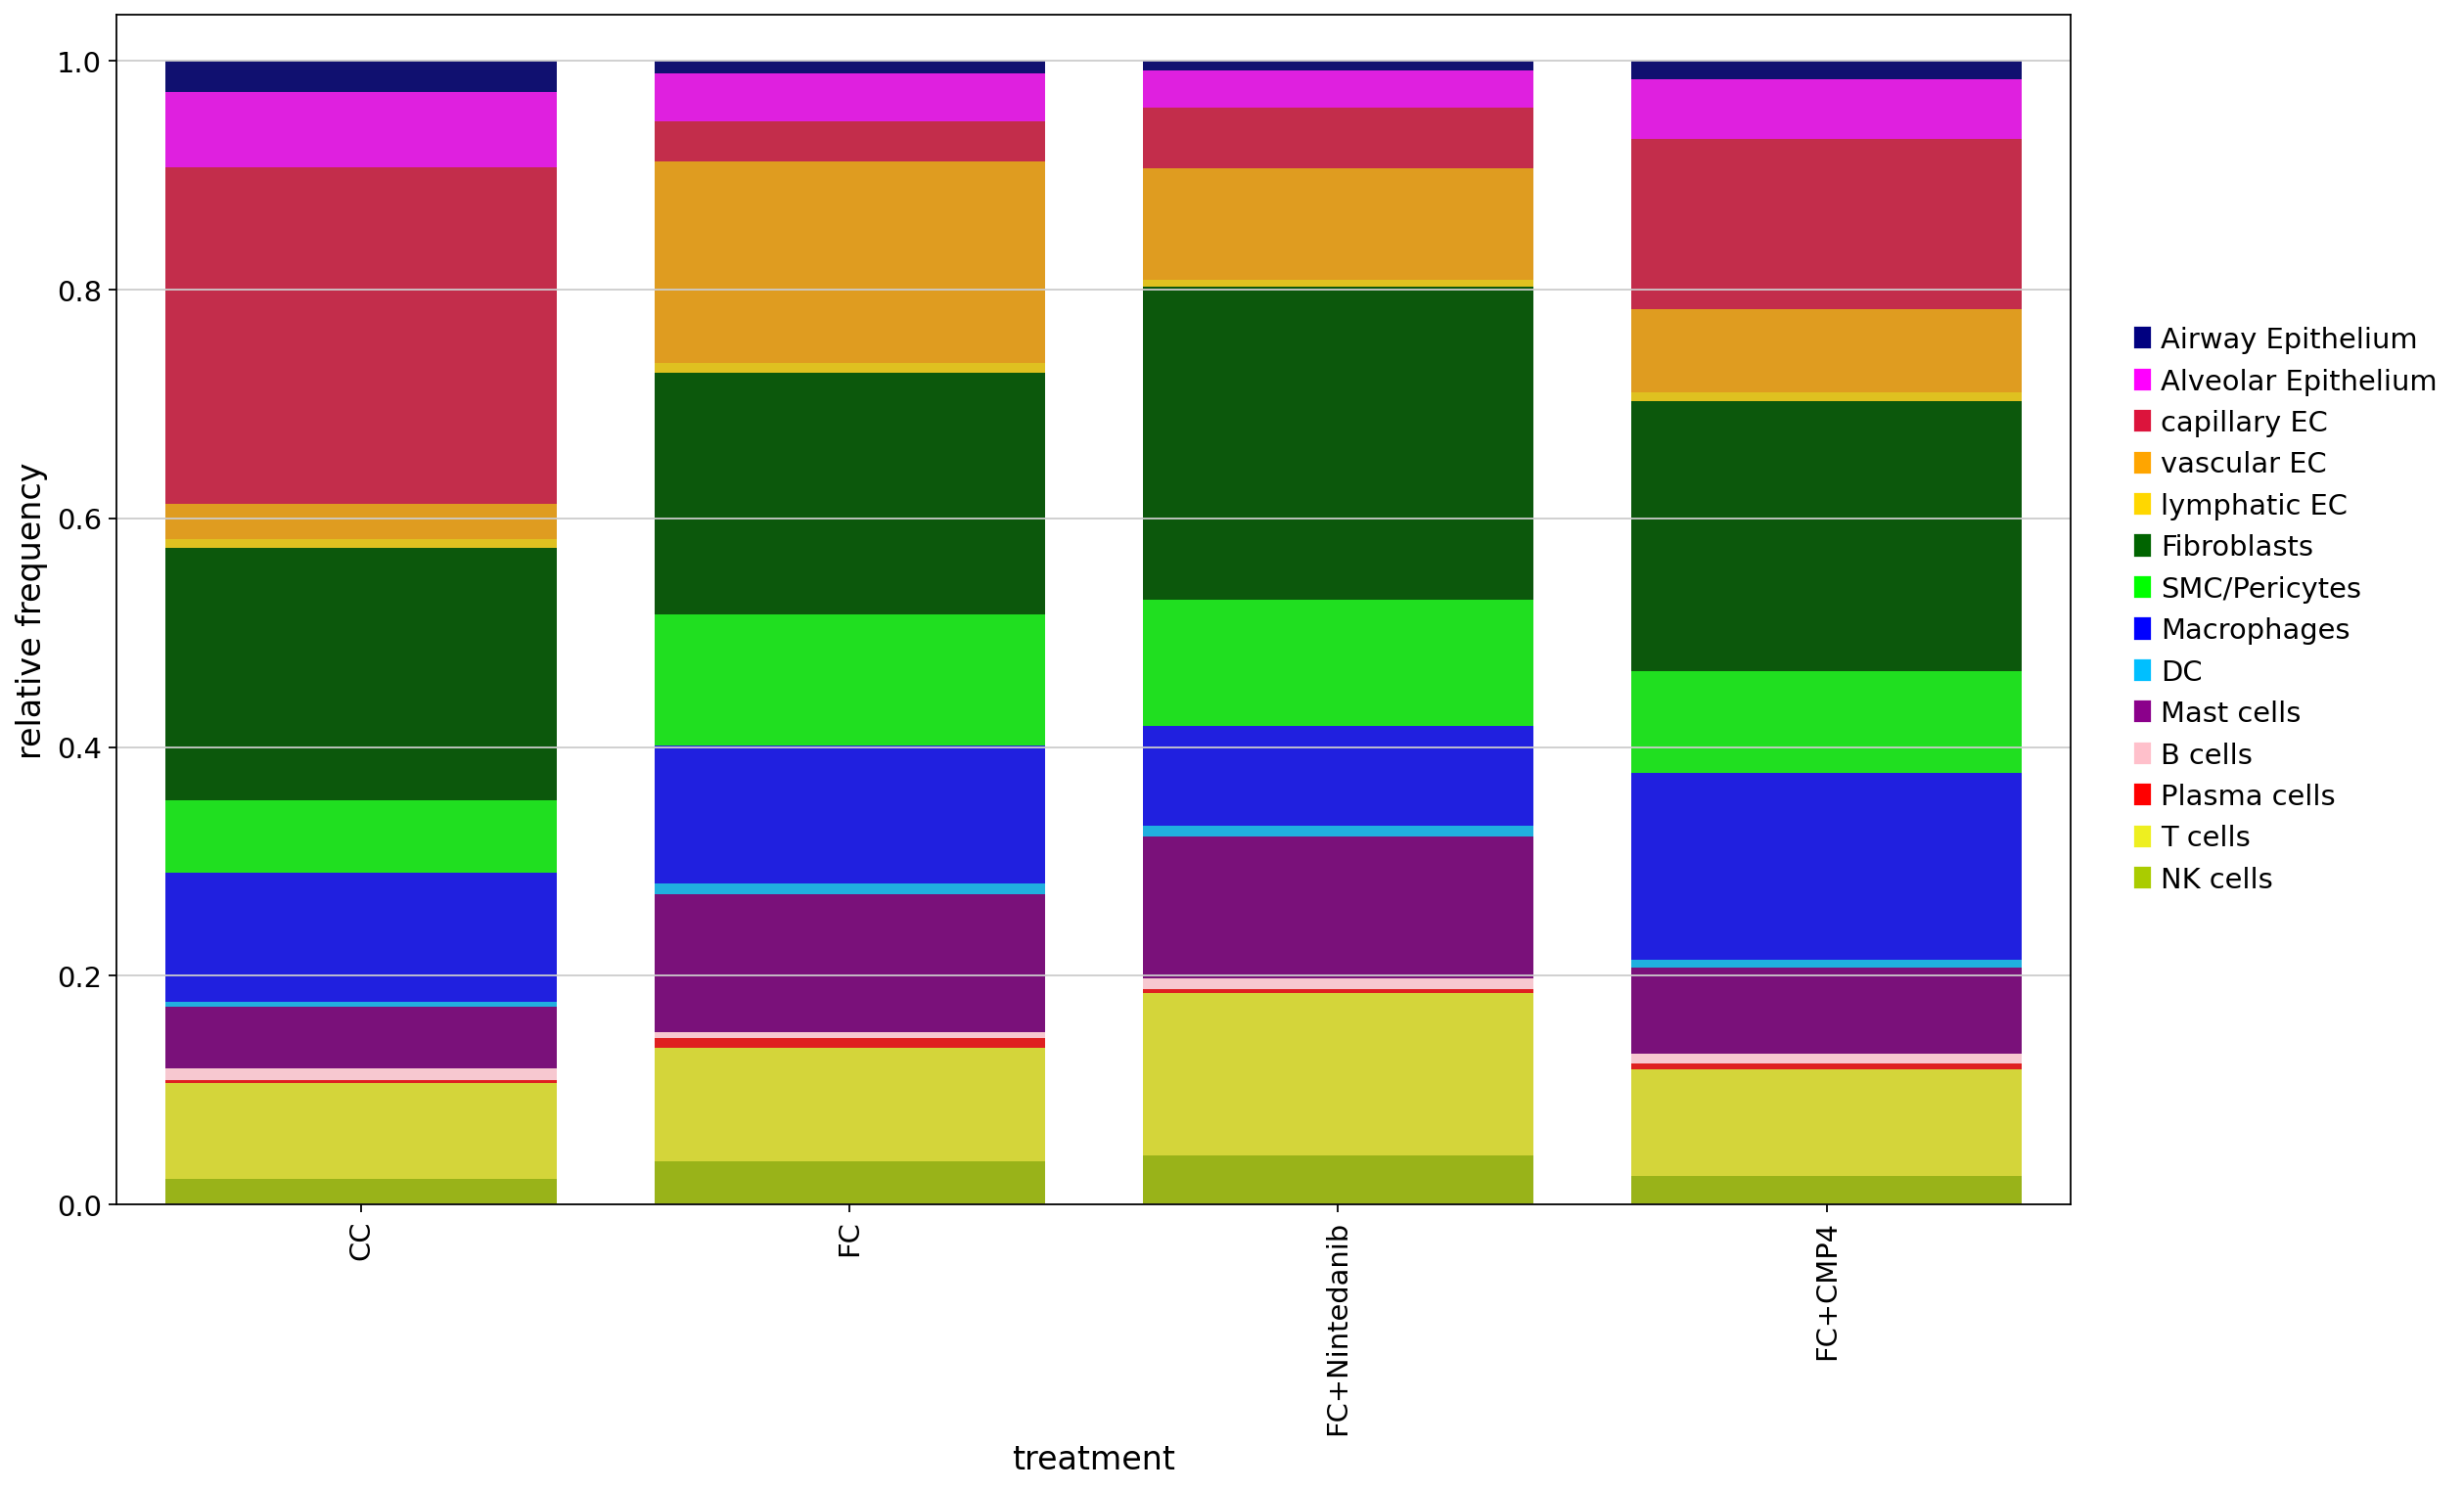

In [16]:
## cell type frequencies per treatment category
sct.plot.cluster_composition_stacked_barplot(relFreqs, xlabel = xlabel, figsize = (16,10), order = ['CC', 'FC','FC+Nintedanib', 'FC+CMP4'],
                              colors = cols, width = 0.8,
                              save = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/rel_freqs.pdf')

In [17]:
## automated heatmap
sc.tl.dendrogram(adata, groupby = 'cell_type_group')
sc.tl.rank_genes_groups(adata, groupby = 'cell_type_group', groups = 'all', use_raw = True, method = 'wilcoxon', n_genes=500)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_type_group']`
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:57)


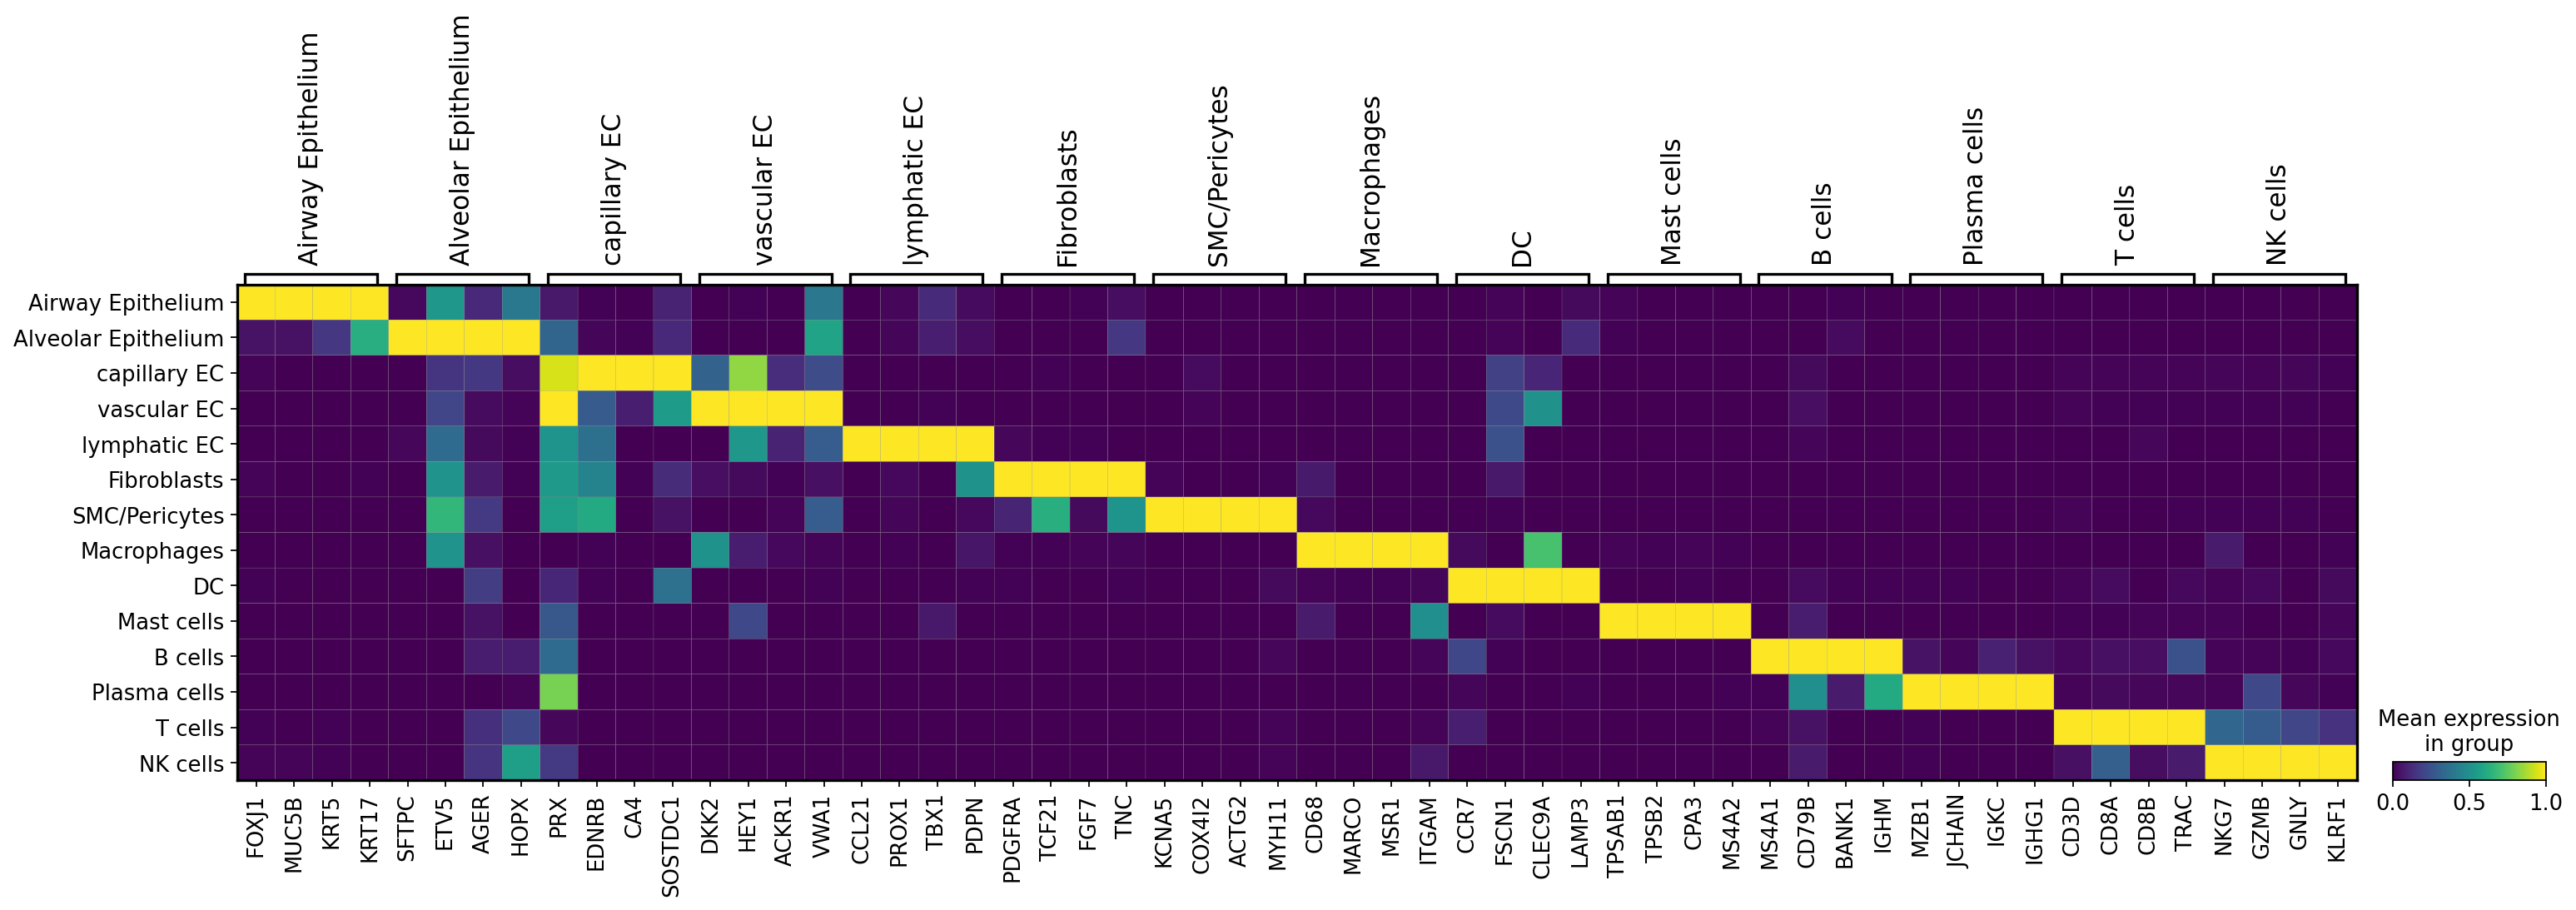

In [19]:
## custom heatmap
# matrixplot with marker genes
celltype_markers={'Airway Epithelium' : ['FOXJ1','MUC5B','KRT5','KRT17'],
                  'Alveolar Epithelium' : ['SFTPC','ETV5','AGER','HOPX'],
                  'capillary EC' : ['PRX','EDNRB','CA4','SOSTDC1'],
                  'vascular EC' : ['DKK2','HEY1','ACKR1','VWA1'],
                  'lymphatic EC' : ['CCL21','PROX1','TBX1','PDPN'],
                  'Fibroblasts' : ['PDGFRA','TCF21','FGF7','TNC'],
                  'SMC/Pericytes' : ['KCNA5','COX4I2','ACTG2','MYH11'],
                  'Macrophages' : ['CD68','MARCO','MSR1','ITGAM'],
                  'DC' : ['CCR7','FSCN1','CLEC9A','LAMP3'],
                  'Mast cells' : ['TPSAB1','TPSB2','CPA3','MS4A2'],
                  'B cells' : ['MS4A1','CD79B','BANK1','IGHM'],
                  'Plasma cells' : ['MZB1','JCHAIN','IGKC','IGHG1'],
                  'T cells' : ['CD3D','CD8A','CD8B','TRAC'],
                  'NK cells' : ['NKG7','GZMB','GNLY','KLRF1']
}
sc.pl.matrixplot(adata, celltype_markers, groupby = 'cell_type_group',standard_scale='var', dendrogram=False,
                     save='curated_markers.pdf' )

### Complementary heatmaps for NicheNet analyses in Fig. 7 and 8

In [20]:
adata.obs['cell_type'] = ['Macrophages' if ct in ['Macrophages','Profibrotic Macrophages'] else ct for ct in adata.obs['cell_type']]

In [21]:
adata.obs['cell_type'] = adata.obs['cell_type'].astype(dtype = 'category')

In [22]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.reorder_categories(['AT1', 'AT2', 'Aberrant Basaloid', 'Basal', 'Ciliated', 'Secretory',
       'capillary EC', 'arterial EC', 'venous EC', 'ectopic EC',
       'lymphatic EC', 'Fibroblasts', 'Myofibroblasts', 'Pericytes', 'SMC',
       'Macrophages', 'DC', 'Mast cells', 'B cells', 'Plasma cells', 'T cells',
       'NK cells'
    
])

In [23]:
# scale and store results in layer
adata.layers['scaled'] = sc.pp.scale(adata, copy=True).X

In [24]:
## ligands sustaining the fibrogenic cell-cell circuit
ligands = ['ITGAM','ADAM17','POMC','EDN1','HAS2','TGFB1','IL1B','IL1A','TNF','HMGB1','SAA1','TNC','NMB','HGF',
           'GAS6','ANXA1','CXCL16','LIF','TNFSF13B','NAMPT','CXCL5','C3','VEGFC','TNFSF14','IL1RN','VWF','ICAM1',
           'ITGB7','PIK3CB','FGF2','SPP1','CALM2','CALM1','AREG','SELPLG','COL4A1','KISS1','OCLN','BMP2','PDGFB',
           'IL11','ANGPT2','IL33','TGFB3','CLCF1','EBI3','PTPRT','JAG1','APLN','IGF1','CD86','TNFSF10','SEMA4D',
           'AIMP1','FGF7','FN1','PTPRF','APP','JAG2','IL7','PTPRC','DUSP18','HMGB2','HLA-DRA','CCL20','PVR',
           'PLAU','COL1A1','ITGB2','BMP6','JAM3','IL18','THBS2','JAM2','LAMB1','CDH5','WNT5A','CALR','MIF',
           'PTPRM','BMP3','GDF11','LAMB2','CCL21','CXCL6','COL5A3','BMP4','SEMA3B','CXCL2','NECTIN1','EFNA4',
           'EFNA1','CDH3','TNFSF4','FGF1','INHBB','INHBA','CCL2','CCL3L3','CCL3','CCL13','CX3CL1','PGF','ANGPT1',
           'IL24','IL15','CCL4','APOE','CSF3','CD80'
]

In [25]:
### old ligands from top10 heatmap
#ligands = ['TNF','HAS2','EDN1','TGFB1','ITGAM','IL1A','IL1B','IL1RN','ANXA1','HMGB1',
#           'IL24','ADAM17','CCL3','CCL13','INHBB','INHBA','TGFB3','BMP3','EBI3','GDF11',
#           'CCL21','BMP2','COL5A3','BMP4','LAMB2','SEMA3B','CXCL2','JAG1','APLN','IGF1',
#           'IL7','DUSP18','IL15','PIK3CB','CD80','CD86','IL33','TNFSF10','SEMA4D','APP',
#           'BMP6','OCLN','CDH5','VWF','CALR','MIF','PTPRM','TNC','POMC','FGF2','SPP1', 
#           'SELPLG','CCL2','CCL3L3','ICAM1','ANGPT2','GAS6','LIF','SAA1']

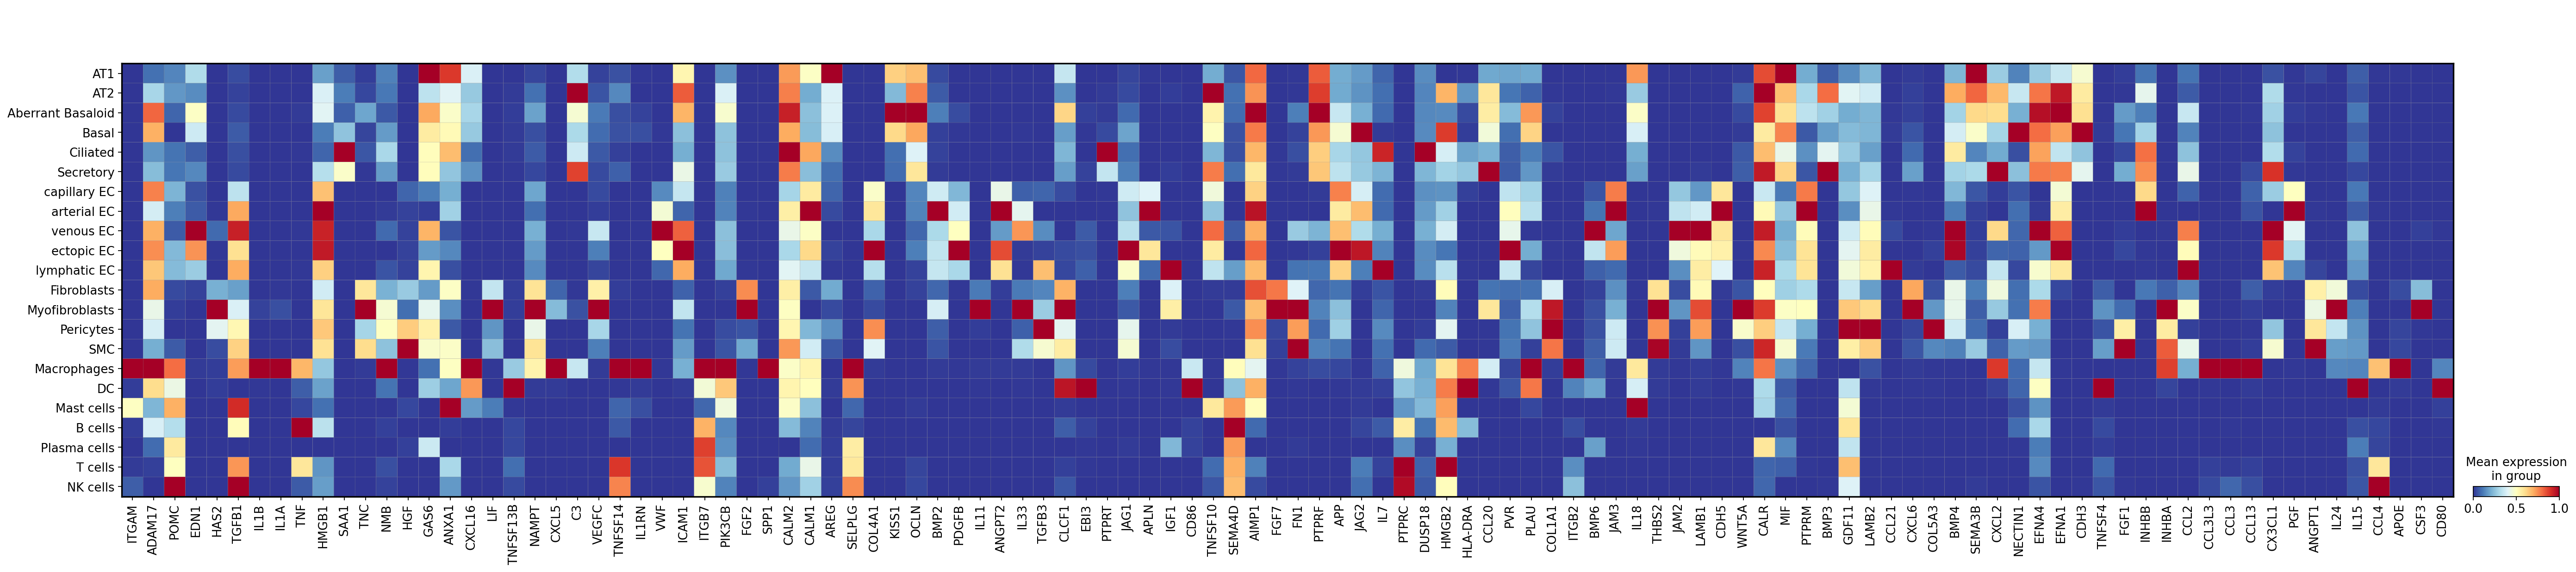

In [26]:
## custom heatmap
# global ligand expression (as predicted by NicheNet)
sc.pl.matrixplot(adata, ligands, groupby = 'cell_type', standard_scale = 'var',
                 #layer = 'scaled', vmin = -1.5, vmax = 1.5,
                 dendrogram = False,  cmap = 'RdYlBu_r',
                 #colorbar_title = 'mean z-score', 
                 swap_axes = False, 
                 save = 'ligand_expression.pdf' )

In [27]:
## modulated ligands after treatment with CMP4 and Nintedanib
modulated_ligands = [
'CXCL12','LAMB2','CXCL2','TNC',
'CCL21','BMP3','OCLN','BMP4','BMP2','NECTIN1','A2M','EDN1','CCL20','COL1A1','NCAM1','HLA-A','CX3CL1','CCL28',
'INHBB','INHBA','ITGAM','GAS6','ADAM17','TNFSF12','HMGB1','TNF','SAA1','TNFSF4','TNFSF13B','VWF','CXCL16',
'EFNA4','CDH1','KISS1','PTPRT','SERPING1','CLCF1','LIF','NMB','CXCL5','NAMPT','ANXA1','IL15',
'ICAM1','HBEGF','CD226','IL18','PTPRF','PNOC','ADM','TIGIT','HLA-G','HLA-E','C3','HGF','HMGB2','IL7',
'PVR','PLAU','ITGB2','HLA-DRA','DUSP18','PTPRC','FGF1','CSF3','CD80','ANGPT1','CCL4','FN1',
'CMTM8','OSM','MMP9','VEGFC','GPI','CELSR1','TNFSF10','SEMA4D','AIMP1','CD86','FGF7','COL5A3',
'SEMA3B','WNT2','OMG','SEMA3A','ADAM12','CRLF1','TNFSF14','JAG2','LAMB1','JAM2','BMP6','WNT5A','JAM3','CDH5','THBS2','JAG1','APLN',
'IGF1','APP','EFNA1','CDH3','PTPRM','CALR','MIF','CXCL6','CD28','POMC','IL11','TNFSF9','ANGPT2','PDGFB','APOE',
'PGF','CCL3','CCL3L3','CCL2','CCL13','C5','SPP1','GMFB','PCDH1','ITGB7','ITGB1','NTN4',
'COL4A1','SELPLG','CALM1','CALM2','AREG','CCL5','PKD1','PDGFA','TSLP','GDF11','PIK3CB','CEACAM1',
'EBI3','TGFB3','BMP7','TGFB1','HAS2','FGF2','IL1RN','IL1B','IL1A','IL33','IL24'
]
modulated_ligands.reverse()

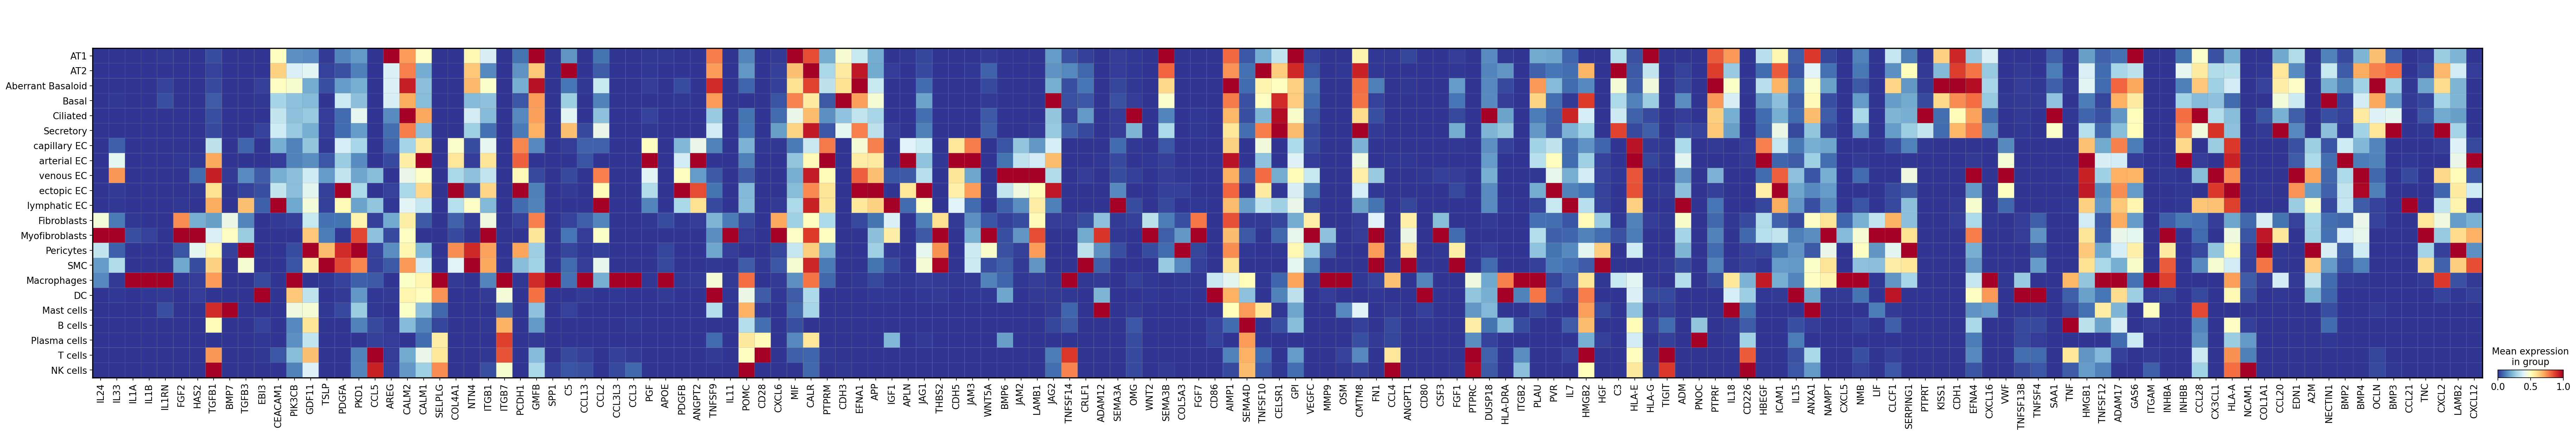

In [29]:
## custom heatmap
# global ligand expression (as predicted by NicheNet)
sc.pl.matrixplot(adata, modulated_ligands, groupby = 'cell_type', standard_scale = 'var',
                 #layer = 'scaled', vmin = -1.5, vmax = 1.5,
                 dendrogram = False,  cmap = 'RdYlBu_r',
                 #colorbar_title = 'mean z-score', 
                 swap_axes = False, 
                 save = 'treatment_modulated_ligand_expression.pdf' )